Number of observations in all data: 3221
Number of observations in Southern states: 1313
Number of observations in second data: 3220
Number of observations in third data: 3220


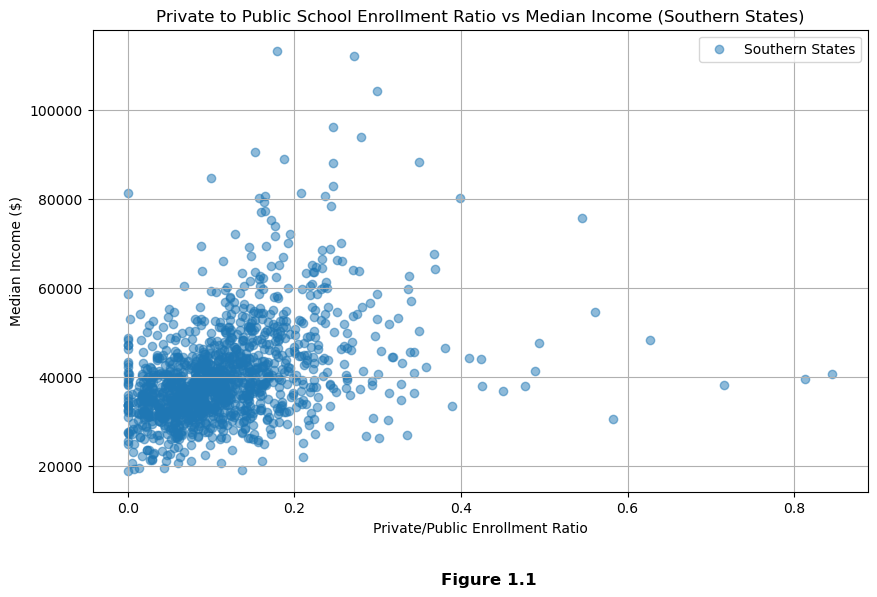

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
path_0003 = 'data/income_2005-9.csv'
data_0003 = pd.read_csv(path_0003)

path_0004 = 'data/ed_2005-9.csv'
data_0004 = pd.read_csv(path_0004)

path_0005 = 'data/ed_2010-14-0006_ds207_20145_county.csv'
data_0005 = pd.read_csv(path_0005)

path_0006 = 'data/income_2010-14-20145_county_E.csv'
data_0006 = pd.read_csv(path_0006)

path_0007 = 'data/income_2015-19-20195_county_E.csv'
data_0007 = pd.read_csv(path_0007)

path_0008 = 'data/income_2015-19-20195_county_E.csv'
data_0008 = pd.read_csv(path_0008)

path_0009 = 'data/ed_2015-19-_2015-19-20195_county_E.csv'
data_0009 = pd.read_csv(path_0009)




# Simplify column names for consistency
data_0003.columns = [col.strip().lower().replace(' ', '_') for col in data_0003.columns]
data_0004.columns = [col.strip().lower().replace(' ', '_') for col in data_0004.columns]
data_0005.columns = [col.strip().lower().replace(' ', '_') for col in data_0005.columns]
data_0006.columns = [col.strip().lower().replace(' ', '_') for col in data_0006.columns]

data_0007.columns = [col.strip().lower().replace(' ', '_') for col in data_0007.columns]
data_0008.columns = [col.strip().lower().replace(' ', '_') for col in data_0008.columns]
data_0009.columns = [col.strip().lower().replace(' ', '_') for col in data_0009.columns]

# Remove empty columns
data_0003.dropna(axis=1, how='all', inplace=True)
data_0004.dropna(axis=1, how='all', inplace=True)
data_0005.dropna(axis=1, how='all', inplace=True)
data_0006.dropna(axis=1, how='all', inplace=True)

data_0007.dropna(axis=1, how='all', inplace=True)
data_0008.dropna(axis=1, how='all', inplace=True)
data_0009.dropna(axis=1, how='all', inplace=True)



# Ensure county and state names are clean for joining
data_0003['county'] = data_0003['county'].str.strip().str.lower()
data_0003['state'] = data_0003['state'].str.strip().str.lower()

data_0004['county'] = data_0004['county'].str.strip().str.lower()
data_0004['state'] = data_0004['state'].str.strip().str.lower()

data_0005['county'] = data_0005['county'].str.strip().str.lower()
data_0005['state'] = data_0005['state'].str.strip().str.lower()

data_0006['county'] = data_0006['county'].str.strip().str.lower()
data_0006['state'] = data_0006['state'].str.strip().str.lower()

data_0007['county'] = data_0007['county'].str.strip().str.lower()
data_0007['state'] = data_0007['state'].str.strip().str.lower()

data_0008['county'] = data_0008['county'].str.strip().str.lower()
data_0008['state'] = data_0008['state'].str.strip().str.lower()


data_0009['county'] = data_0009['county'].str.strip().str.lower()
data_0009['state'] = data_0009['state'].str.strip().str.lower()


# Southern states list
southern_states = ['alabama', 'arkansas', 'florida', 'georgia', 'kentucky', 'louisiana', 'misssissippi', 'north carolina', 'oklahoma', 'south carolina', 'tennessee', 'texas', 'virginia', 'west virginia']
# Merge on county and state
merged_data = pd.merge(data_0004, data_0003[['county', 'state', 'rnhe001']], on=['county', 'state'], how='inner')

# Rename median income column for clarity
merged_data.rename(columns={'rnhe001': 'median_income'}, inplace=True)

# Aggregate private and public school enrollments
merged_data['private_school_enrollment'] = (
    merged_data[['rmxe006', 'rmxe030', 'rmxe012', 'rmxe036', 'rmxe018', 'rmxe042']].sum(axis=1)
)
merged_data['public_school_enrollment'] = (
    merged_data[['rmxe005', 'rmxe029', 'rmxe011', 'rmxe035', 'rmxe017', 'rmxe041']].sum(axis=1)
)

# Calculate private to public enrollment ratio
merged_data['private_to_public_ratio'] = (
    merged_data['private_school_enrollment'] / merged_data['public_school_enrollment']
)


# ------------------Merge on county and state------------------------
merged_data2 = pd.merge(data_0005, data_0006[['county', 'state', 'abdpe001']], on=['county', 'state'], how='inner')

# Rename median income column for clarity
merged_data2.rename(columns={'abdpe001': 'median_income'}, inplace=True)

# Aggregate private and public school enrollments
merged_data2['private_school_enrollment'] = (
    merged_data2[['abrke012', 'abrke040']].sum(axis=1)
)
merged_data2['public_school_enrollment'] = (
    merged_data2[['abrke031', 'abrke030']].sum(axis=1)
)

# Calculate private to public enrollment ratio
merged_data2['private_to_public_ratio'] = (
    merged_data2['private_school_enrollment'] / merged_data2['public_school_enrollment']
)




# ------------------Merge on county and state------------------------
merged_data3 = pd.merge(data_0009, data_0008[['county', 'state', 'alw1e001']], on=['county', 'state'], how='inner')


# Rename median income column for clarity
merged_data3.rename(columns={'alw1e001': 'median_income'}, inplace=True)

# Aggregate private and public school enrollments
merged_data3['private_school_enrollment'] = (
    merged_data3[['amaxe040', 'amaxe012']].sum(axis=1)
)
merged_data3['public_school_enrollment'] = (
    merged_data3[['amaxe003', 'amaxe031']].sum(axis=1)
)

# Calculate private to public enrollment ratio
merged_data3['private_to_public_ratio'] = (
    merged_data3['private_school_enrollment'] / merged_data3['public_school_enrollment']
)

# Filter data for Southern states
southern_data = merged_data[merged_data['state'].isin(southern_states)]

southern_data2 = merged_data2[merged_data2['state'].isin(southern_states)]

southern_data3 = merged_data3[merged_data3['state'].isin(southern_states)]



# Print the number of observations
print(f"Number of observations in all data: {len(merged_data)}")
print(f"Number of observations in Southern states: {len(southern_data)}")

print(f"Number of observations in second data: {len(merged_data2)}")

print(f"Number of observations in third data: {len(merged_data3)}")


# Plot the filtered data (Southern states)
plt.figure(figsize=(10, 6))
plt.scatter(southern_data['private_to_public_ratio'], southern_data['median_income'], alpha=0.5, label='Southern States')

# plt.scatter(southern_data2['private_to_public_ratio'], southern_data2['median_income'], alpha=0.5, label='Southern States 2')


plt.title('Private to Public School Enrollment Ratio vs Median Income (Southern States)')
plt.ylabel('Median Income ($)')
plt.xlabel('Private/Public Enrollment Ratio')
plt.text(0.45, -0.2, 'Figure 1.1', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

plt.grid(True)
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:          median_income   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           6.27e-46
Time:                        16:23:51   Log-Likelihood:                -13994.
No. Observations:                1313   AIC:                         2.799e+04
Df Residuals:                    1311   BIC:                         2.800e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

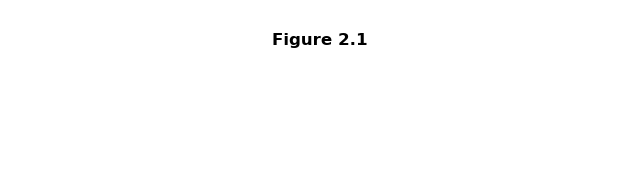

In [3]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Ensure no missing values in relevant columns
regression_data = southern_data.dropna(subset=['median_income', 'private_to_public_ratio'])

# Define dependent and independent variables
y = regression_data['median_income']  # Dependent variable
X = regression_data['private_to_public_ratio']  # Independent variable

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())

# Create a figure to display the label
plt.figure(figsize=(8, 2))
plt.axis('off')  # Turn off the axes
plt.text(0.5, 0.8, 'Figure 2.1', fontsize=12, fontweight='bold', ha='center', va='center')
plt.show()


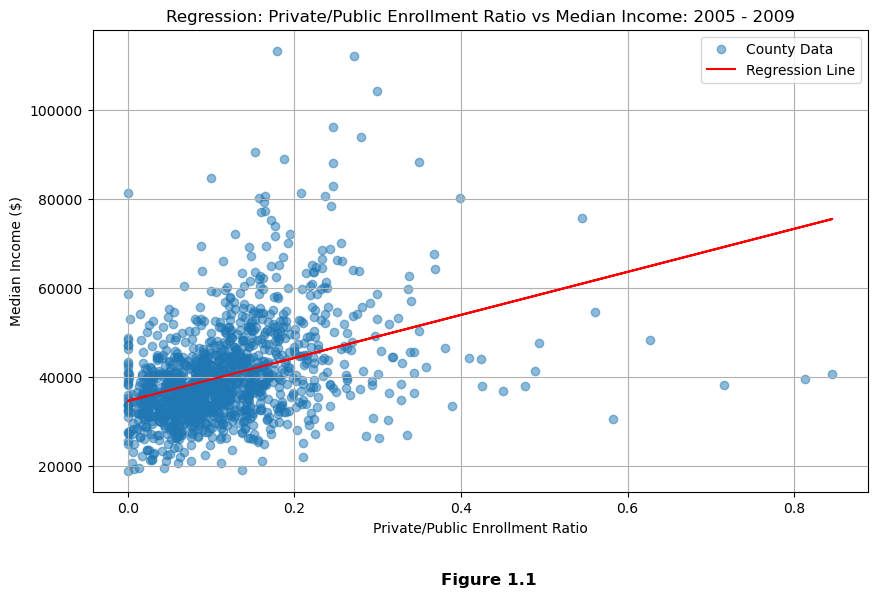

In [4]:
import matplotlib.pyplot as plt

# Predicted values for the regression line
regression_data['predicted_income'] = model.predict(X)  # Use the regression model to predict y-values (median income)

# Scatter plot of actual data
plt.figure(figsize=(10, 6))
plt.scatter(regression_data['private_to_public_ratio'], regression_data['median_income'], alpha=0.5, label='County Data')

# Plot the regression line
plt.plot(
    regression_data['private_to_public_ratio'], 
    regression_data['predicted_income'], 
    color='red', 
    label='Regression Line'
)

# Add labels, title, and grid
plt.title('Regression: Private/Public Enrollment Ratio vs Median Income: 2005 - 2009')
plt.ylabel('Median Income ($)')
plt.xlabel('Private/Public Enrollment Ratio')
plt.legend()
plt.grid(True)

# Add figure text
plt.text(0.45, -0.2, 'Figure 1.1', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

# Show the plot
plt.show()


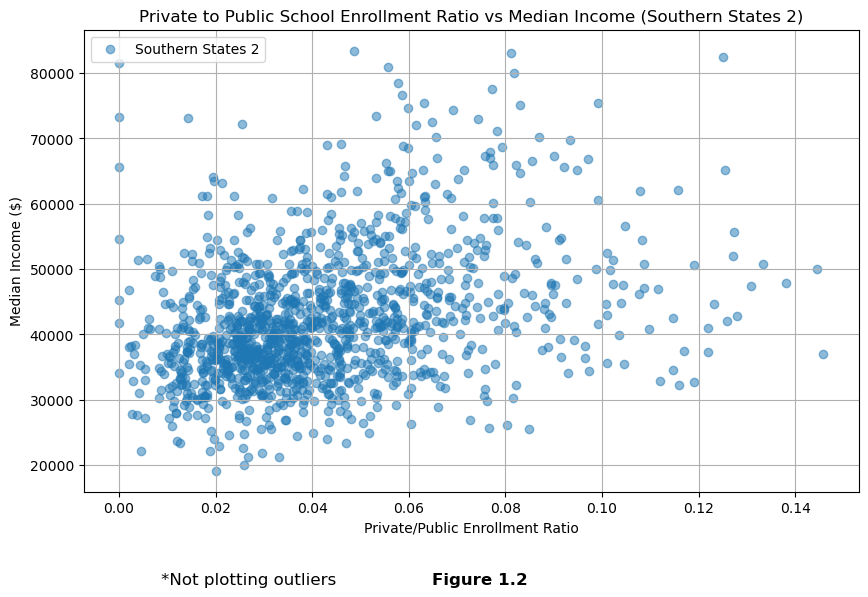

In [5]:
import numpy as np

# Calculate the bounds for filtering out extreme outliers
q1_ratio = southern_data2['private_to_public_ratio'].quantile(0.25)
q3_ratio = southern_data2['private_to_public_ratio'].quantile(0.75)
iqr_ratio = q3_ratio - q1_ratio

q1_income = southern_data2['median_income'].quantile(0.25)
q3_income = southern_data2['median_income'].quantile(0.75)
iqr_income = q3_income - q1_income

# Define limits for what is "not super far away"
lower_bound_ratio = q1_ratio - 3 * iqr_ratio
upper_bound_ratio = q3_ratio + 3 * iqr_ratio

lower_bound_income = q1_income - 3 * iqr_income
upper_bound_income = q3_income + 3 * iqr_income

# Filter data for plotting
filtered_data2 = southern_data2[
    (southern_data2['private_to_public_ratio'] >= lower_bound_ratio) &
    (southern_data2['private_to_public_ratio'] <= upper_bound_ratio) &
    (southern_data2['median_income'] >= lower_bound_income) &
    (southern_data2['median_income'] <= upper_bound_income)
]

# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data2['private_to_public_ratio'], filtered_data2['median_income'], alpha=0.5, label='Southern States 2')

# Add title, labels, and grid
plt.title('Private to Public School Enrollment Ratio vs Median Income (Southern States 2)')
plt.ylabel('Median Income ($)')
plt.xlabel('Private/Public Enrollment Ratio')
plt.text(0.45, -0.2, 'Figure 1.2', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.text(0.1, -0.2, '*Not plotting outliers', transform=plt.gca().transAxes, fontsize=12)

# Display legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


                            OLS Regression Results                            
Dep. Variable:          median_income   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     165.1
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           1.12e-35
Time:                        16:23:52   Log-Likelihood:                -14066.
No. Observations:                1312   AIC:                         2.814e+04
Df Residuals:                    1310   BIC:                         2.815e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

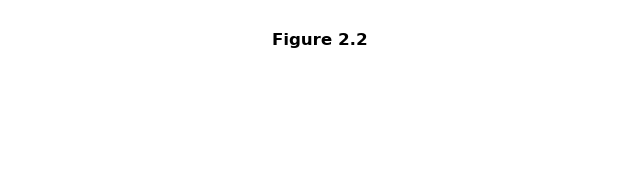

In [6]:
# Ensure no missing values in relevant columns
regression_data = southern_data2.dropna(subset=['median_income', 'private_to_public_ratio'])

# Define dependent and independent variables
y = regression_data['median_income']  # Dependent variable
X = regression_data['private_to_public_ratio']  # Independent variable

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())

# Create a figure to display the label
plt.figure(figsize=(8, 2))
plt.axis('off')  # Turn off the axes
plt.text(0.5, 0.8, 'Figure 2.2', fontsize=12, fontweight='bold', ha='center', va='center')
plt.show()

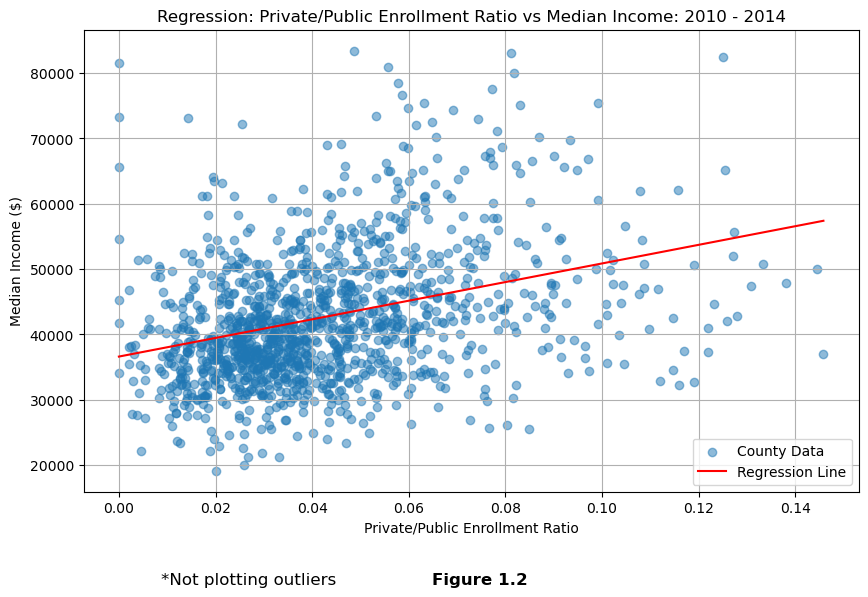

In [7]:
import matplotlib.pyplot as plt

# Predicted values for the regression line
regression_data['predicted_income'] = model.predict(X)  # Use the regression model to predict y-values (median income)


plot_x_min = filtered_data2['private_to_public_ratio'].min()
plot_x_max = filtered_data2['private_to_public_ratio'].max()


# Generate x-values for the regression line within the plot range
regression_x = np.linspace(plot_x_min, plot_x_max, 100)
regression_x_with_const = sm.add_constant(regression_x)  # Add constant for prediction

# Predict y-values (median income) for the restricted x-range using the regression model
regression_y = model.predict(regression_x_with_const)


# Scatter plot of actual data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data2['private_to_public_ratio'], filtered_data2['median_income'], alpha=0.5, label='County Data')

# Plot the regression line
plt.plot(
    regression_x, 
    regression_y, 
    color='red', 
    label='Regression Line'
)

# Add labels, title, and grid
plt.title('Regression: Private/Public Enrollment Ratio vs Median Income: 2010 - 2014')
plt.ylabel('Median Income ($)')
plt.xlabel('Private/Public Enrollment Ratio')
plt.legend()
plt.grid(True)
plt.text(0.1, -0.2, '*Not plotting outliers', transform=plt.gca().transAxes, fontsize=12)

# Add figure text
plt.text(0.45, -0.2, 'Figure 1.2', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

# Show the plot
plt.show()


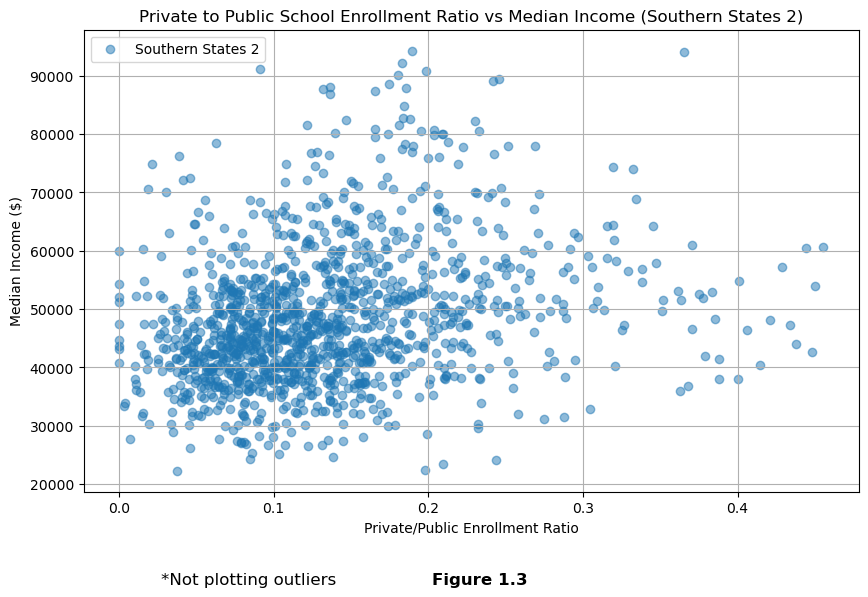

In [8]:
#this is for number 3 

import numpy as np

# Calculate the bounds for filtering out extreme outliers
q1_ratio = southern_data3['private_to_public_ratio'].quantile(0.25)
q3_ratio = southern_data3['private_to_public_ratio'].quantile(0.75)
iqr_ratio = q3_ratio - q1_ratio

q1_income = southern_data3['median_income'].quantile(0.25)
q3_income = southern_data3['median_income'].quantile(0.75)
iqr_income = q3_income - q1_income

# Define limits for what is "not super far away"
lower_bound_ratio = q1_ratio - 3 * iqr_ratio
upper_bound_ratio = q3_ratio + 3 * iqr_ratio

lower_bound_income = q1_income - 3 * iqr_income
upper_bound_income = q3_income + 3 * iqr_income

# Filter data for plotting
filtered_data3 = southern_data3[
    (southern_data3['private_to_public_ratio'] >= lower_bound_ratio) &
    (southern_data3['private_to_public_ratio'] <= upper_bound_ratio) &
    (southern_data3['median_income'] >= lower_bound_income) &
    (southern_data3['median_income'] <= upper_bound_income)
]

# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data3['private_to_public_ratio'], filtered_data3['median_income'], alpha=0.5, label='Southern States 2')

# Add title, labels, and grid
plt.title('Private to Public School Enrollment Ratio vs Median Income (Southern States 2)')
plt.ylabel('Median Income ($)')
plt.xlabel('Private/Public Enrollment Ratio')
plt.text(0.45, -0.2, 'Figure 1.3', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.text(0.1, -0.2, '*Not plotting outliers', transform=plt.gca().transAxes, fontsize=12)

# Display legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


                            OLS Regression Results                            
Dep. Variable:          median_income   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     77.17
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           4.82e-18
Time:                        16:23:52   Log-Likelihood:                -14302.
No. Observations:                1311   AIC:                         2.861e+04
Df Residuals:                    1309   BIC:                         2.862e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

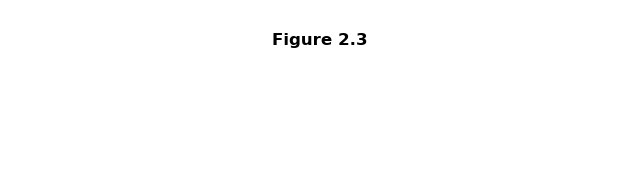

In [9]:
# Ensure no missing values in relevant columns
regression_data = southern_data3.dropna(subset=['median_income', 'private_to_public_ratio'])

# Define dependent and independent variables
y = regression_data['median_income']  # Dependent variable
X = regression_data['private_to_public_ratio']  # Independent variable

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())

# Create a figure to display the label
plt.figure(figsize=(8, 2))
plt.axis('off')  # Turn off the axes
plt.text(0.5, 0.8, 'Figure 2.3', fontsize=12, fontweight='bold', ha='center', va='center')
plt.show()

/var/folders/ws/nxv2509902s8ktxyw30r6qyw0000gn/T/ipykernel_57652/1636793986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data['predicted_income'] = model.predict(X)  # Use the regression model to predict y-values (median income)


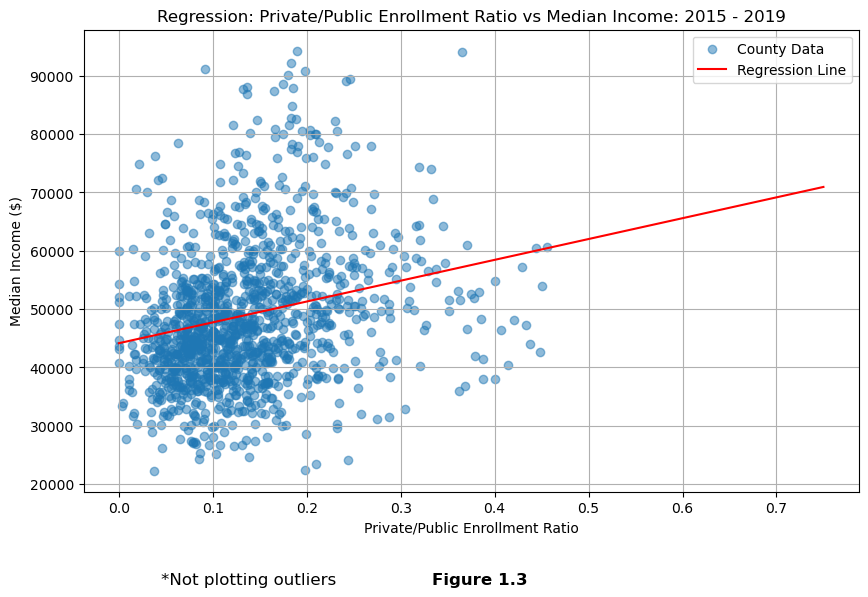

In [12]:
import matplotlib.pyplot as plt

# Predicted values for the regression line
regression_data['predicted_income'] = model.predict(X)  # Use the regression model to predict y-values (median income)


plot_x_min = filtered_data3['private_to_public_ratio'].min()
plot_x_max = 0.75


# Generate x-values for the regression line within the plot range
regression_x = np.linspace(plot_x_min, plot_x_max, 100)
regression_x_with_const = sm.add_constant(regression_x)  # Add constant for prediction

# Predict y-values (median income) for the restricted x-range using the regression model
regression_y = model.predict(regression_x_with_const)


# Scatter plot of actual data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data3['private_to_public_ratio'], filtered_data3['median_income'], alpha=0.5, label='County Data')

# Plot the regression line
plt.plot(
    regression_x, 
    regression_y, 
    color='red', 
    label='Regression Line'
)

# Add labels, title, and grid
plt.title('Regression: Private/Public Enrollment Ratio vs Median Income: 2015 - 2019')
plt.ylabel('Median Income ($)')
plt.xlabel('Private/Public Enrollment Ratio')
plt.legend()
plt.grid(True)
plt.text(0.1, -0.2, '*Not plotting outliers', transform=plt.gca().transAxes, fontsize=12)

# Add figure text
plt.text(0.45, -0.2, 'Figure 1.3', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

# Show the plot
plt.show()
